# E-Commerce Shipping Data




# Part 1. Data Analysis and Bayes Nets.


# Reasons for choosing this data set

In [4]:
# import libaries 
import pandas as pd
import seaborn as sns

# plot figures
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from fast_ml.outlier_treatment import OutlierTreatment 

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ROC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Initial Data Exploration

In [3]:
#load the data
df=pd.read_csv("Data.csv")
#Number of entries and attributes
df.shape

(10999, 12)

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# more info about the data such as number of Attributes (columns), null / non null data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
# Checking the null values
#df.isna().values.any() --> this is other way to check the null values if any
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Cleaning the data

In [8]:
# copy df to data for cleaning operations
data=df.copy()

In [9]:
# drop ID since it is not important
data.drop('ID', axis = 1, inplace = True)

In [10]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Visualizing the data

In [11]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


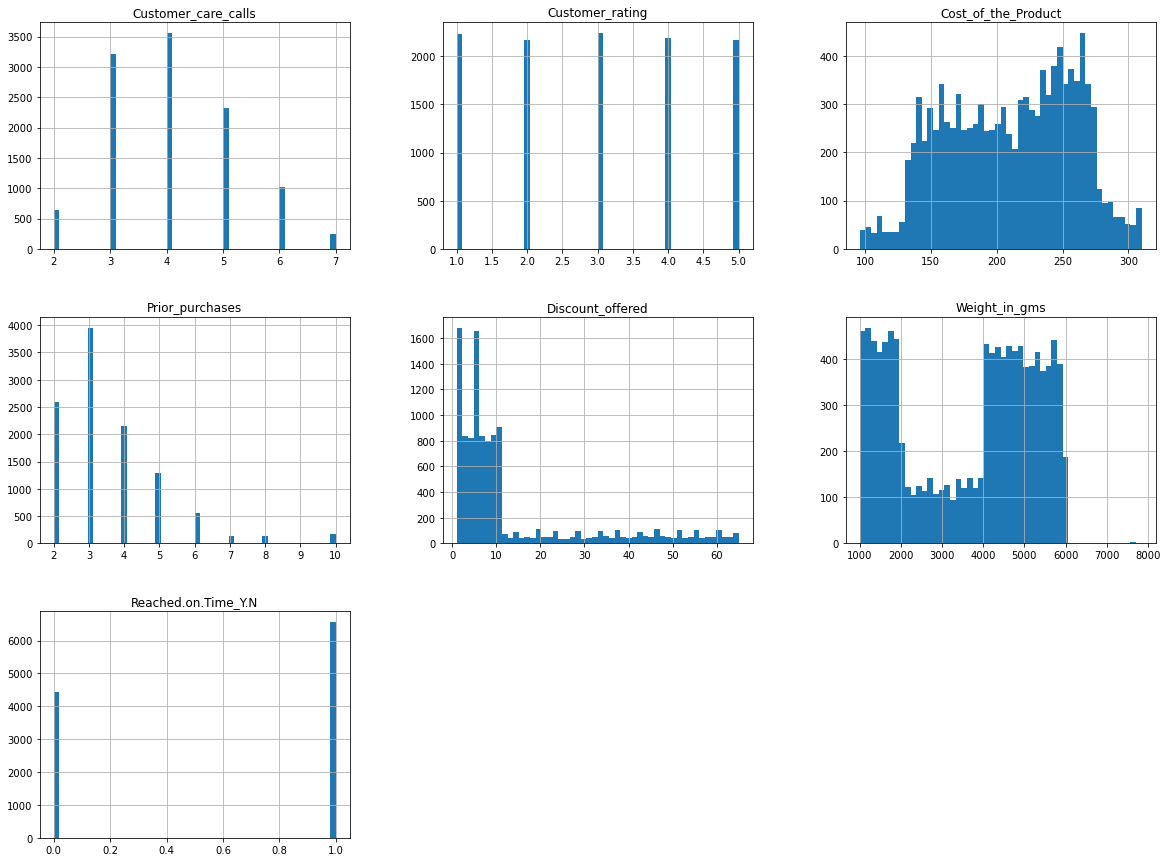

In [12]:
# Plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

# Checking the correlation between features

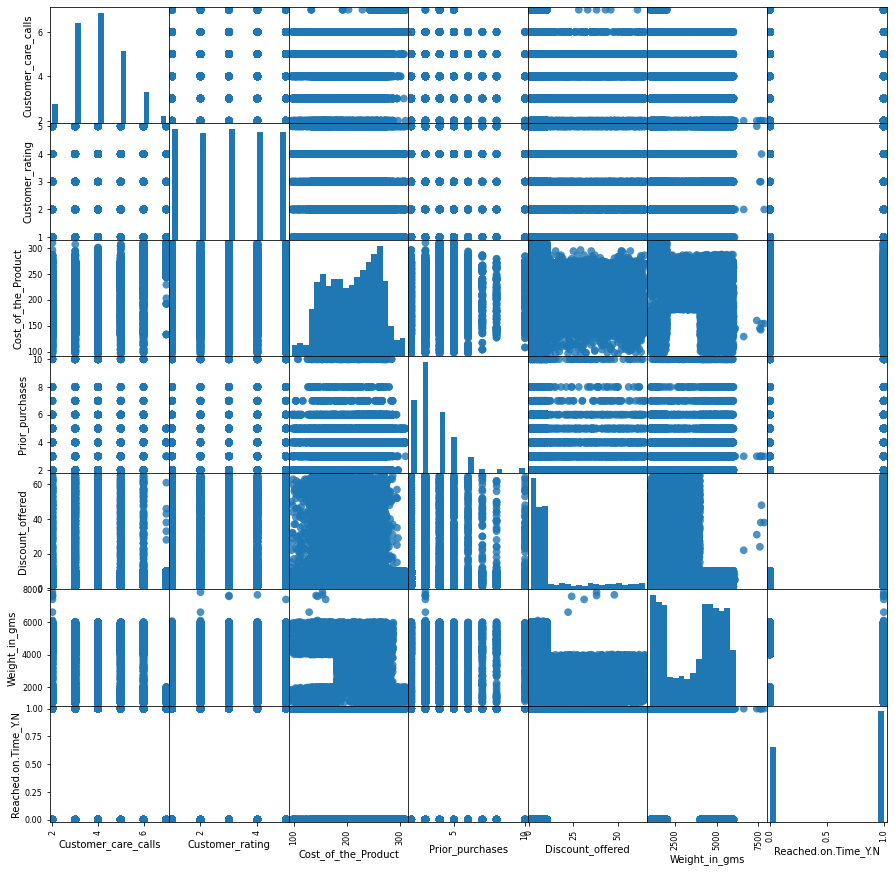

In [13]:
# Check the corrleation between attributes
scatter_matrix(data, marker='o', figsize=(15, 15), hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

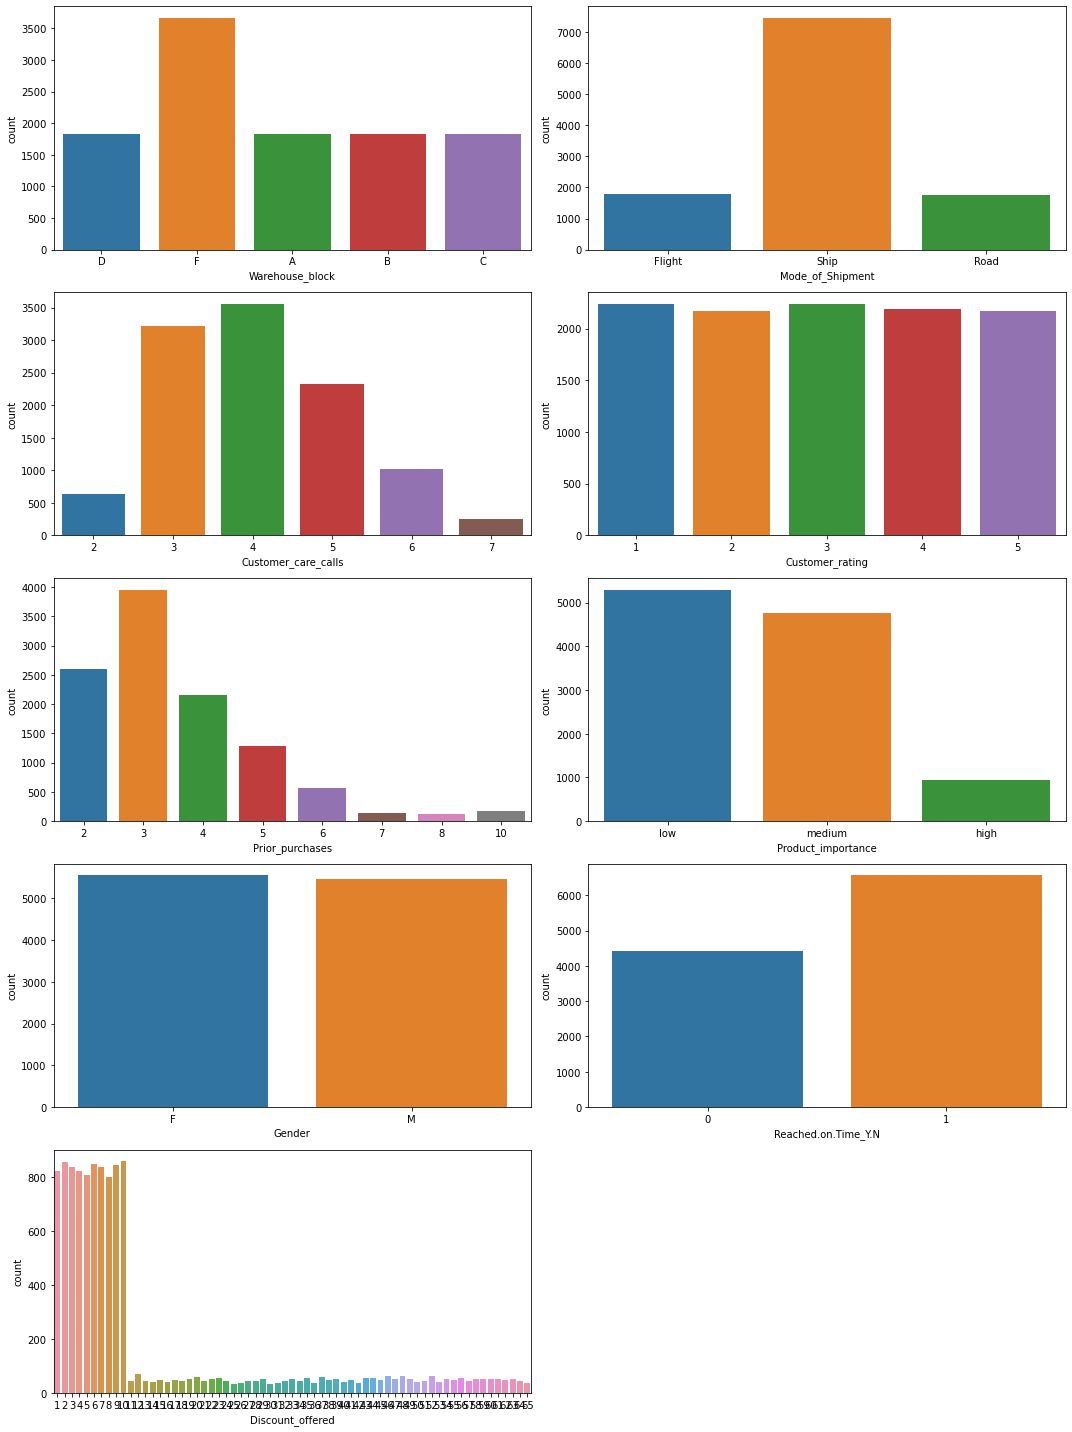

In [15]:
# Showing the counts with categories for the below coulmns
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender", "Reached.on.Time_Y.N", "Discount_offered" ]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = columns[i],ax=ax, data = data)
    plotnumber += 1
    plt.tight_layout()
plt.show()

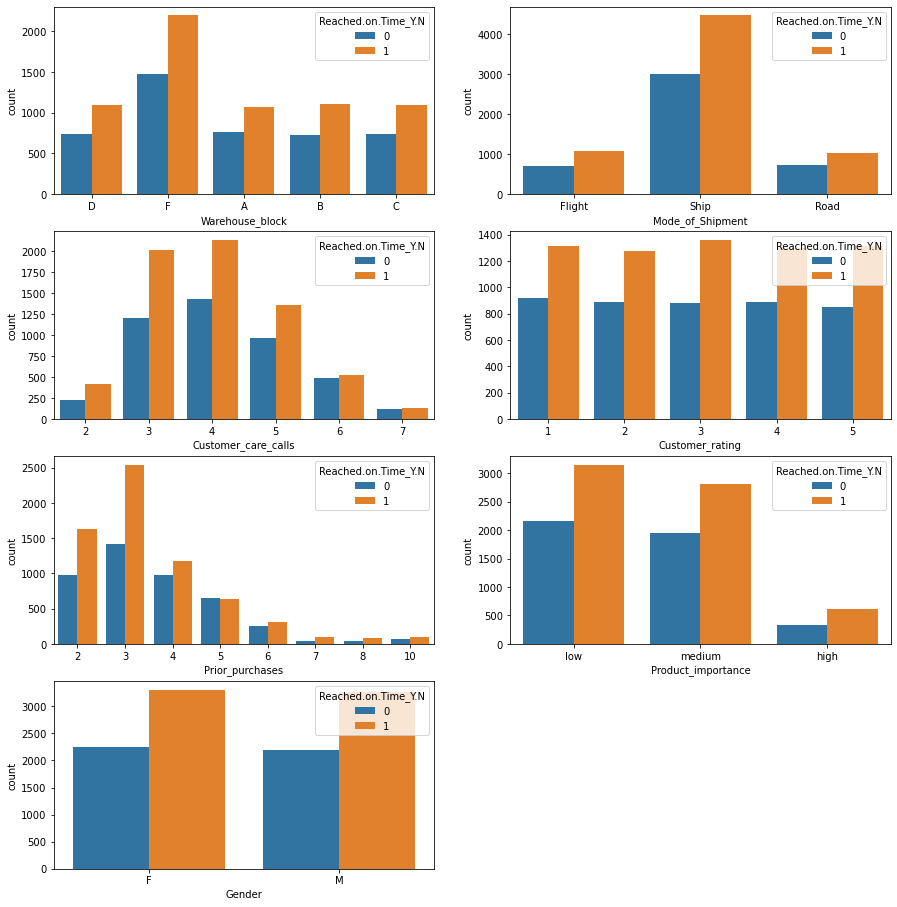

In [13]:
# Explore the relation between Reached on time and other attributes
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = data, ax=ax)
    plotnumber += 1
plt.show()

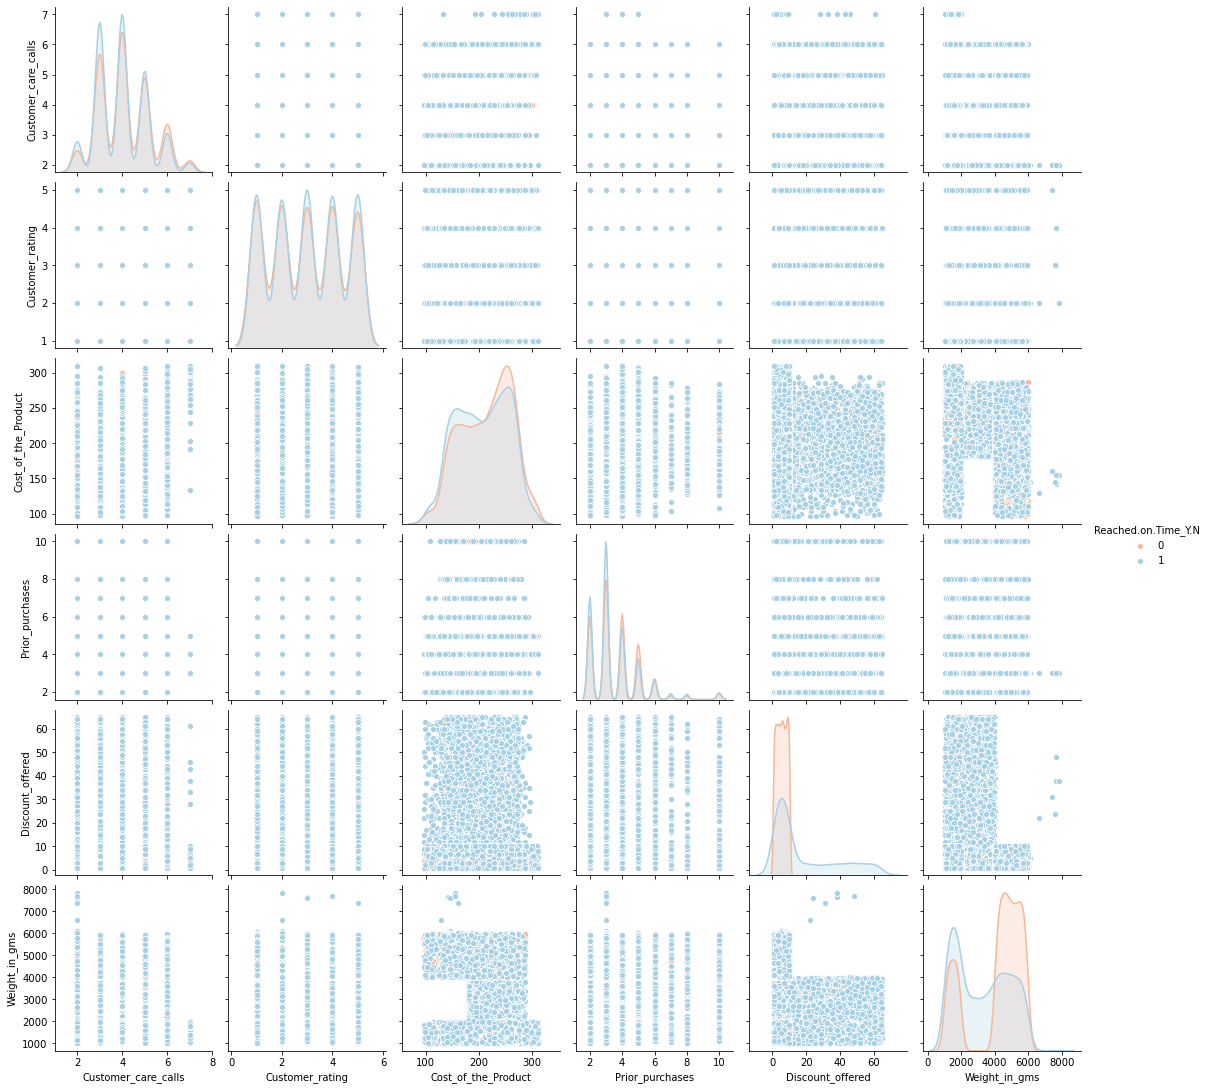

In [14]:
# Other way of visulization the correeltation with Reached on time to consider also Dicsount_Offered and Weighs 
sns.pairplot(data=data, hue = "Reached.on.Time_Y.N", palette = "RdBu")

# Pre-processing

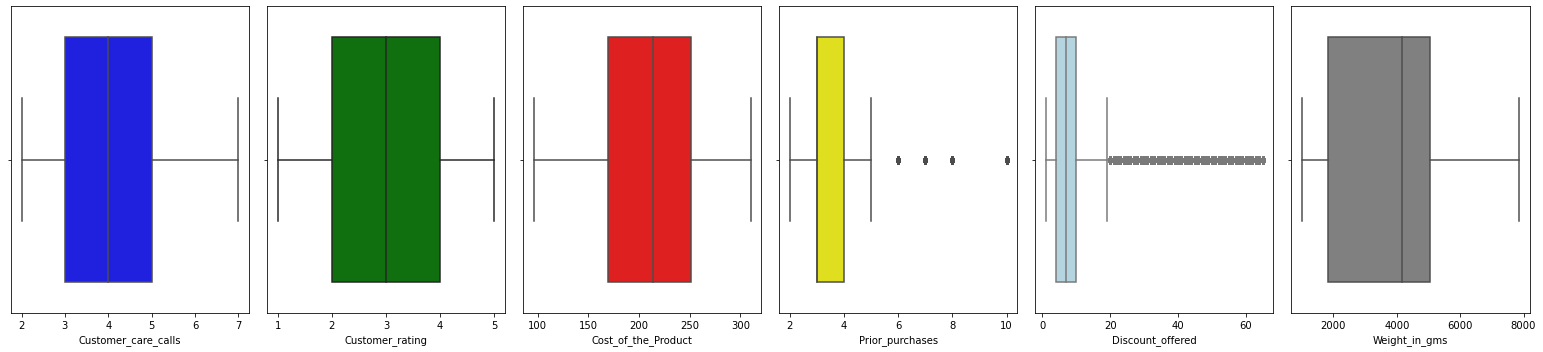

In [16]:
#Detecting outliers if any for the numerical data (not the cateogries)
numericData= data.select_dtypes(include=['number'])
plt.figure(figsize=(25,5))
for i,colour in zip(range(0, len(numericData.columns)),['blue', 'green', 'red', 'yellow','lightblue','gray']):
    plt.subplot(1,len(numericData.columns),i+1)
    sns.boxplot(numericData[numericData.columns[i]], color=colour)
    plt.tight_layout()

In [17]:
# Outliers Treatment using fast_ml.outlier_treatment
ots = OutlierTreatment() 
ots.fit(data,["Discount_offered"])  
ots.fit(data,["Prior_purchases"])
data = ots.transform(data)
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,44,1233,1
1,F,Flight,4,5,216,2.0,low,M,59,3088,1
2,A,Flight,2,2,183,4.0,low,M,48,3374,1
3,B,Flight,3,3,176,4.0,medium,M,10,1177,1
4,C,Flight,2,2,184,3.0,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5.0,medium,F,1,1538,1
10995,B,Ship,4,1,232,5.0,medium,F,6,1247,0
10996,C,Ship,5,4,242,5.0,low,F,4,1155,0
10997,F,Ship,5,2,223,5.5,medium,M,2,1210,0


In [18]:
#Normalization: convert categorical variable into numerical/indicator variables
encoder = LabelEncoder()
data['Mode_of_Shipment'] = encoder.fit_transform(data['Mode_of_Shipment'])
data['Product_importance'] = encoder.fit_transform(data['Product_importance'])
data['Warehouse_block'] = encoder.fit_transform(data['Warehouse_block'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1,0,44,1233,1
1,4,0,4,5,216,2.0,1,1,59,3088,1
2,0,0,2,2,183,4.0,1,1,48,3374,1
3,1,0,3,3,176,4.0,2,1,10,1177,1
4,2,0,2,2,184,3.0,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,0,1,1538,1
10995,1,2,4,1,232,5.0,2,0,6,1247,0
10996,2,2,5,4,242,5.0,1,0,4,1155,0
10997,4,2,5,2,223,5.5,2,1,2,1210,0


# Features Correlation (Positive or Negative)

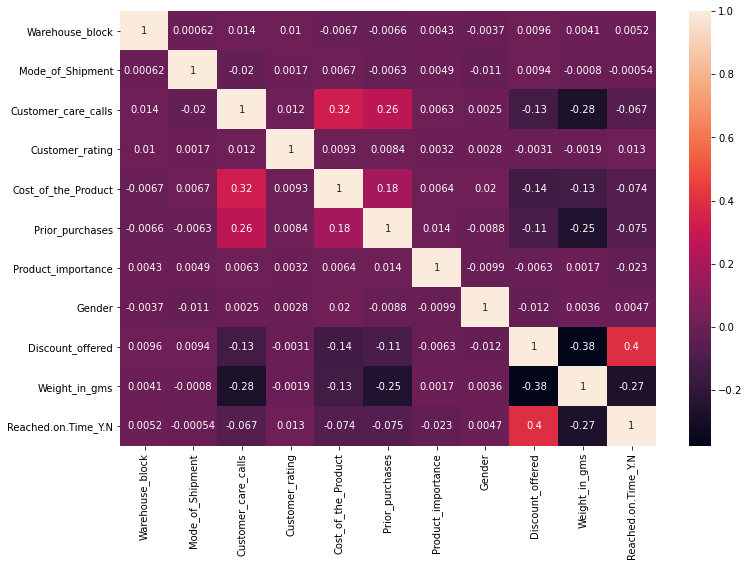

In [19]:
# present the correlation in clear way by showing the positive or negative correlation between attributes
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(),  annot = True)

# Features Scaling 

In [20]:
# Scaling each feature to a given range
# MinMaxScaler subtracts the minimum value in the feature and then divides by the range.
# The range is the difference between the original maximum and original minimum.
scaler = MinMaxScaler()
scaler.fit(data.drop('Reached.on.Time_Y.N',axis=1))
scaled_features = scaler.transform(data.drop('Reached.on.Time_Y.N',axis=1))
dataScale = pd.DataFrame(scaled_features,columns=data.columns[:-1])
dataScale.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.75,0.0,0.4,0.25,0.378505,0.285714,0.5,0.0,0.671875,0.033893
1,1.00,0.0,0.4,1.00,0.560748,0.000000,0.5,1.0,0.906250,0.304894
2,0.00,0.0,0.0,0.25,0.406542,0.571429,0.5,1.0,0.734375,0.346676
3,0.25,0.0,0.2,0.50,0.373832,0.571429,1.0,1.0,0.140625,0.025712
4,0.50,0.0,0.0,0.25,0.411215,0.285714,1.0,0.0,0.703125,0.216654


# Run Naïve Bayes Classifier 

In [21]:
# run the naive Bayes on data to predict the reached on time
#x= data.drop('Reached.on.Time_Y.N', axis=1)
x=dataScale
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.655


              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.99      0.42      0.59      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.81      0.66      0.64      2200



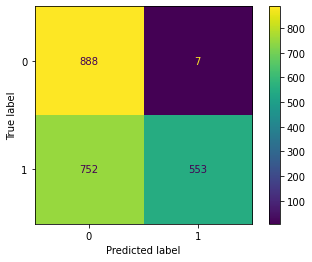

In [22]:
# Recording the major metrics
print(classification_report(y_test,y_pred))
#print(metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)
#cm = metrics.confusion_matrix(y_test, y_pred)
#print('\nTrue Negatives(TP) = ', cm[0,0])
#print('\nTrue Positives(TN) = ', cm[1,1])
#print('\nFalse Positives(FP) = ', cm[0,1])
#print('\nFalse Negatives(FN) = ', cm[1,0])

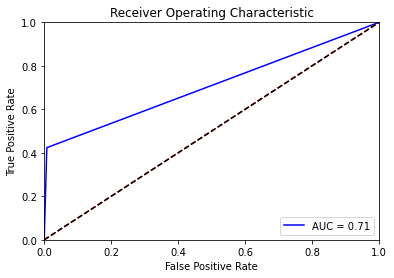

In [23]:
#ROC Curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0,1], [0,1], 'k--' )

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Forming 3 Data Sets

Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.99      0.42      0.59      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.81      0.66      0.64      2200



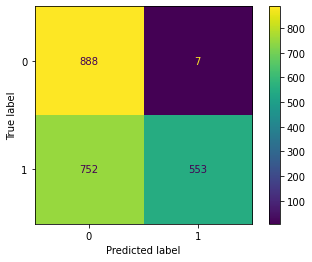

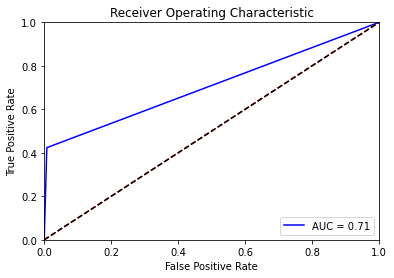

In [24]:
# DataSet 1 with 10 attributes

dataSet1=dataScale[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", "Discount_offered", "Weight_in_gms"]]
x=dataSet1
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)
#ROC Curve
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0,1], [0,1], 'k--' )

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.6414545454545455
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1100
           1       1.00      0.40      0.57      1650

    accuracy                           0.64      2750
   macro avg       0.76      0.70      0.63      2750
weighted avg       0.81      0.64      0.62      2750



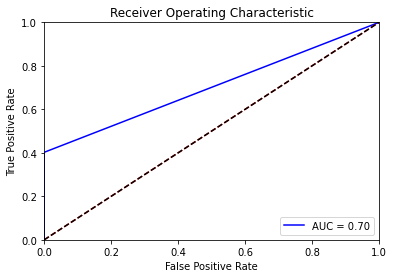

In [30]:
# DataSet 2 with 5 attributes

#dataSet2=dataScale[["Warehouse_block", "Mode_of_Shipment", "Customer_rating","Gender","Discount_offered"]]
dataSet2=dataScale[["Warehouse_block", "Mode_of_Shipment", "Discount_offered", "Customer_care_calls", "Product_importance"]]

x=dataSet2
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
#ROC Curve
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0,1], [0,1], 'k--' )

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.6472727272727272
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



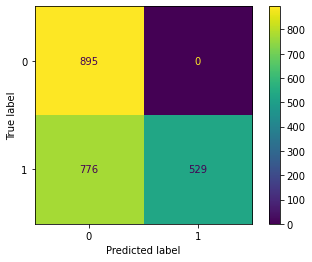

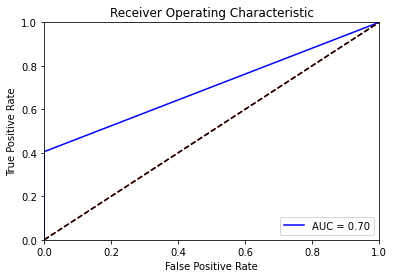

In [40]:
# DataSet3 with 2 attributes

#dataSet3=dataScale[[ "Customer_rating", "Discount_offered"]]
#"Warehouse_block", "Mode_of_Shipment", "Discount_offered", "Customer_care_calls", "Product_importance"
dataSet3=dataScale[[ "Warehouse_block", "Discount_offered"]]
x=dataSet3
y = data['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(nb, X_test, y_test)

#ROC Curve
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0,1], [0,1], 'k--' )

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Optional: Run other ML Classifier

In [41]:
# with train size 75%
x=dataScale
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, shuffle=True, random_state=42)
Models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier()                       
}
for name, model in Models.items():
    model.fit(X_train, y_train)
    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

Random Forest: 67.27%
Gradient Boosting: 68.07%
Logistic Regression: 63.96%
KNN: 64.15%
Decision Tree: 64.69%
Support Vector Machine (Linear Kernel): 64.51%
Support Vector Machine (RBF Kernel): 65.53%
Neural Network: 66.51%


Accuracy: 0.6807272727272727
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      1100
           1       0.86      0.56      0.68      1650

    accuracy                           0.68      2750
   macro avg       0.71      0.71      0.68      2750
weighted avg       0.74      0.68      0.68      2750



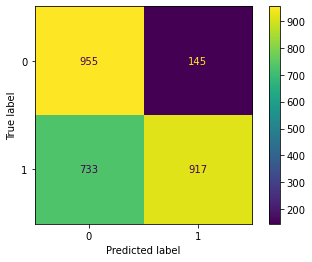

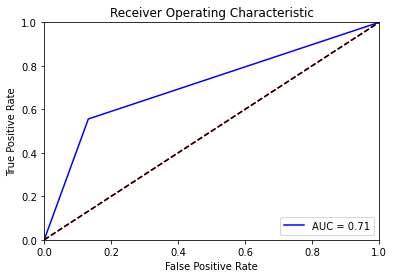

In [42]:
x=dataScale
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, shuffle=True, random_state=42)

model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix = plot_confusion_matrix(model, X_test, y_test)

#ROC Curve
plt.figure()
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0,1], [0,1], 'k--' )

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()